# Análise exploratória
## Predição da qualidade num processo de mineração
Análise dos dados com conhecimento leve sobre o processo. Também utilizado para desafio de análise exploratória com python e pandas da DIO.

Dados do [kaggle](https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process).

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [10]:
Os dados 
df = pd.read_csv('../input/quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv',
                decimal=',', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [11]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [12]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


Os dados não possuem valores nulos nem nenhuma valor claramente errado pelas estatísticas descritivas. Para essa etapa inicial focar mais nas relações com o concentrado de silica.

<AxesSubplot:xlabel='% Silica Concentrate', ylabel='Count'>

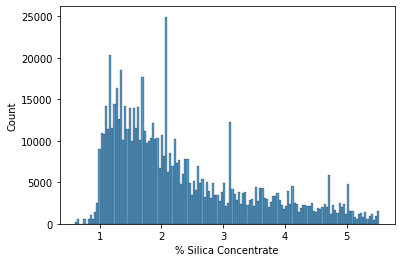

In [17]:
sns.histplot(data=df, x='% Silica Concentrate')

<AxesSubplot:xlabel='% Silica Concentrate'>

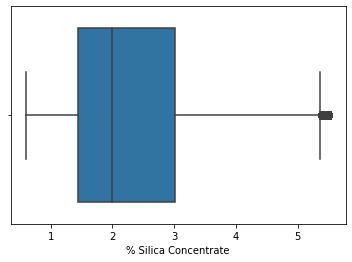

In [19]:
sns.boxplot(data=df, x='% Silica Concentrate')

A distribuição é enviesada para a esquerda e com valores mais frequentes entre 1 e 2,5.
Será que isso pode ser melhorado com uma escala log?

<AxesSubplot:xlabel='% Silica Concentrate', ylabel='Count'>

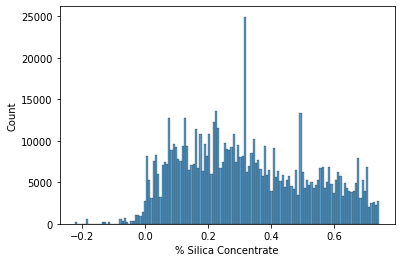

In [20]:
plot_df = df.copy()
plot_df['% Silica Concentrate'] = np.log10(plot_df['% Silica Concentrate'])
sns.histplot(data=plot_df, x='% Silica Concentrate')

Uma melhorada mas não um comportamento normal. Testar depois o comportamento por dia.

In [23]:
plot_df = df.copy()
plot_df.groupby('date')['% Silica Concentrate'].size()
# sns.lineplot(data=plot_df, x='% Silica Concentrate')

date
2017-03-10 01:00:00    174
2017-03-10 02:00:00    180
2017-03-10 03:00:00    180
2017-03-10 04:00:00    180
2017-03-10 05:00:00    180
                      ... 
2017-09-09 19:00:00    180
2017-09-09 20:00:00    180
2017-09-09 21:00:00    180
2017-09-09 22:00:00    180
2017-09-09 23:00:00    180
Name: % Silica Concentrate, Length: 4097, dtype: int64

Por que tantos valores para a mesma data? E aparentemente 180 valores sempre. Será que são dados coletados no periodo da hora e agrupados ou de sensores diferentes?

<AxesSubplot:xlabel='date', ylabel='% Silica Concentrate'>

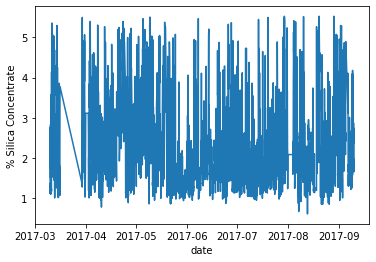

In [24]:
plot_df = df.copy()
plot_df = plot_df.groupby('date', as_index=False)['% Silica Concentrate'].mean()
sns.lineplot(data=plot_df, x='date', y='% Silica Concentrate')

Aparentemente sem nenhum padrão discernível no tempo, olhar mais depois que entender sobre o processo.

In [25]:
plot_df = df.copy()
plot_df = plot_df.groupby('date', as_index=False)['% Silica Concentrate'].agg(['max', 'mean', 'min'])
plot_df

,max,mean,min
date,,,
2017-03-10 01:00:00,1.31,1.31,1.31
2017-03-10 02:00:00,1.11,1.11,1.11
2017-03-10 03:00:00,1.27,1.27,1.27
2017-03-10 04:00:00,1.36,1.36,1.36
2017-03-10 05:00:00,1.34,1.34,1.34
...,...,...,...
2017-09-09 19:00:00,1.65,1.65,1.65
2017-09-09 20:00:00,1.71,1.71,1.71
2017-09-09 21:00:00,1.80,1.80,1.80


Aparentemente os valores são iguais de concentrado de silica, com os preditores podendo variar. Olhando no .head() da df vi que os valores ao longo da coluna de flotação mudam.